# DAgger: Hopper-v4 Experiment Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 'num_agent_train_steps_per_iter', 'n_iter']
cont_hyper_params = ['learning_rate']

## Hopper v4 Experiment Hyper-parameter optimization analysis

In [7]:
experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q2_tune_hopper')]

In [8]:
len(experiments)

248

In [9]:
import json

In [10]:
from tqdm import tqdm

In [12]:
df = None
for experiment in tqdm(sorted(experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 or params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            
            if df is None:
                df = progress_df.iloc[-1, :].copy()
            else:
                df = pd.concat([df, progress_df.iloc[-1, :]], axis=1)
        else:
            continue
    except:
        print(experiment)
        continue
df = df.T

 27%|█████████████████████████████▉                                                                                 | 67/248 [00:00<00:01, 131.33it/s]

q2_tune_hopper_Hopper-v4_16-09-2022_18-00-55
q2_tune_hopper_dagger_Hopper-v4_15-09-2022_22-07-27


 40%|███████████████████████████████████████████▊                                                                   | 98/248 [00:00<00:01, 142.82it/s]

q2_tune_hopper_dagger_Hopper-v4_16-09-2022_01-31-02
q2_tune_hopper_dagger_Hopper-v4_16-09-2022_04-00-18


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 242/248 [00:01<00:00, 168.70it/s]

q2_tune_hopper_dagger_Hopper-v4_16-09-2022_13-35-36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:01<00:00, 156.32it/s]

q2_tune_hopper_dagger_Hopper-v4_16-09-2022_18-16-04


In [13]:
df.shape

(242, 49)

In [14]:
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,which_gpu,max_replay_buffer_size,save_params,seed,logdir,discrete,ac_dim,ob_dim,render_mode,Eval_Accuracy
14,14,130.1254,97.80689,692.4176,47.394558,84.05042,132.04346,98.73431,487.56848,47.122738,...,0,1000000,False,2042,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,3,11,None,NaN
14,14,1012.5728,232.42252,1423.0964,191.15736,299.147059,1080.0381,0.0,1080.0381,1080.0381,...,0,1000000,False,2325,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,3,11,None,NaN
4,4,283.58334,189.20062,850.92755,102.18744,113.0,299.2014,230.81654,832.8403,100.50717,...,0,1000000,False,2564,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,3,11,None,NaN
14,14,931.216,129.09871,1362.4905,777.05164,277.486486,914.5329,0.0,914.5329,914.5329,...,0,1000000,False,2661,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,3,11,None,NaN
24,24,894.4711,214.07213,1701.3391,438.7811,266.921053,892.9303,186.45534,1149.6168,443.11877,...,0,1000000,False,2917,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,3,11,None,NaN


In [15]:
df.reset_index(drop=True, inplace=True)

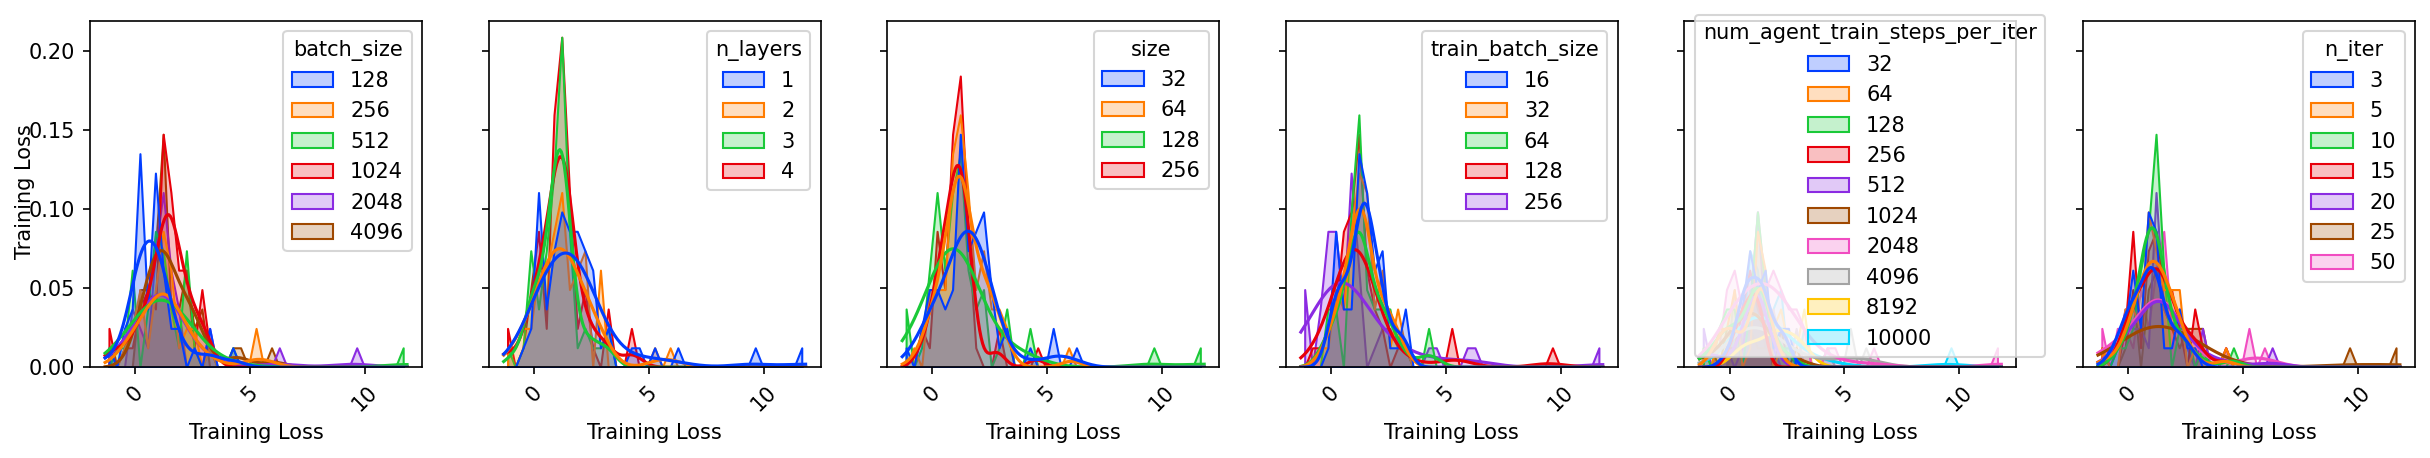

In [16]:
fig, ax = plt.subplots(1, len(cat_hyper_params), sharey=True, sharex=False, figsize=(20, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.histplot(data=df, x='Training Loss', hue=param, ax=ax[i], fill=True,
                     palette=sns.color_palette('bright', len(df[param].unique())), kde=True, 
                     element='poly', stat='density')
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3609280/2126316504.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,


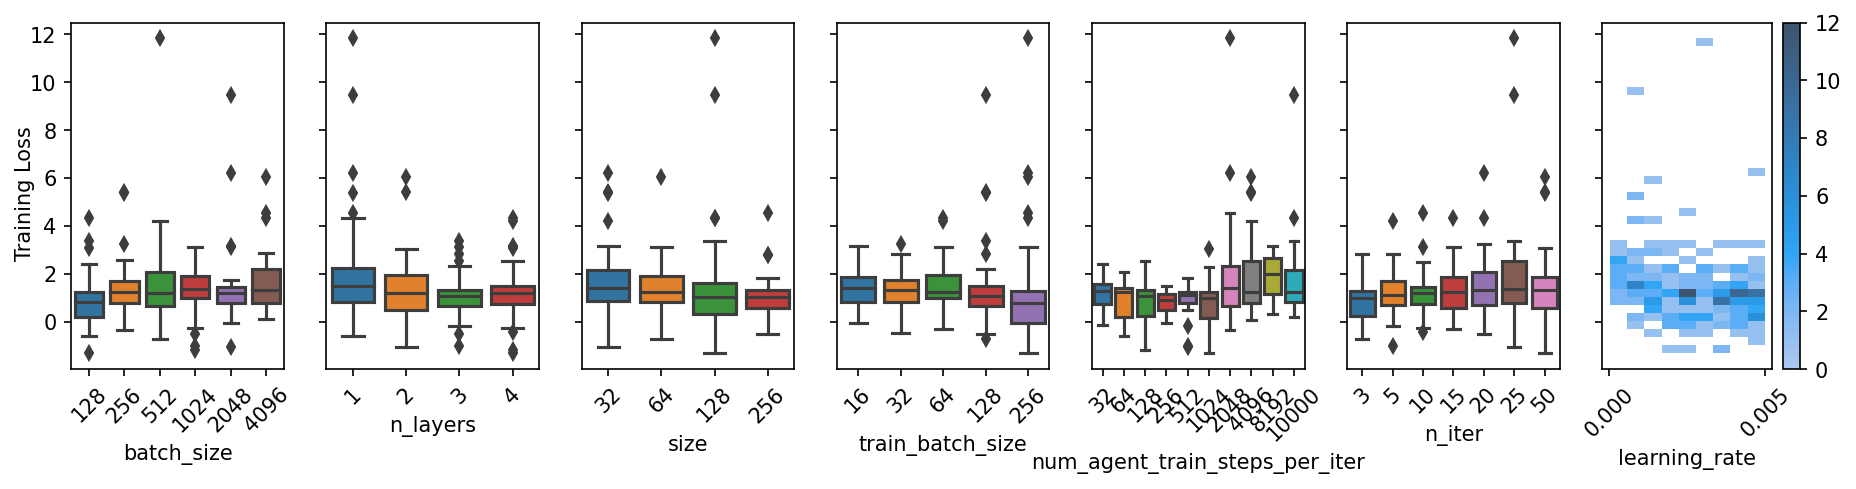

In [17]:
fig, ax = plt.subplots(1, len(cat_hyper_params) + len(cont_hyper_params), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.boxplot(data=df, x=param, y='Training Loss', ax=ax[i])
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

offset = len(cat_hyper_params)

for i, param in enumerate(cont_hyper_params):
    # g = sns.scatterplot(data=df, x=param, y='Training Loss', ax=ax[i + offset])
    # g.set_ylabel('')
    g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,
            palette=sns.color_palette("coolwarm", as_cmap=True), cbar=True,
            ax=ax[i + offset])
    ax[i + offset].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3609280/2945391405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
/home/mohsen/miniconda3/envs/cs285/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


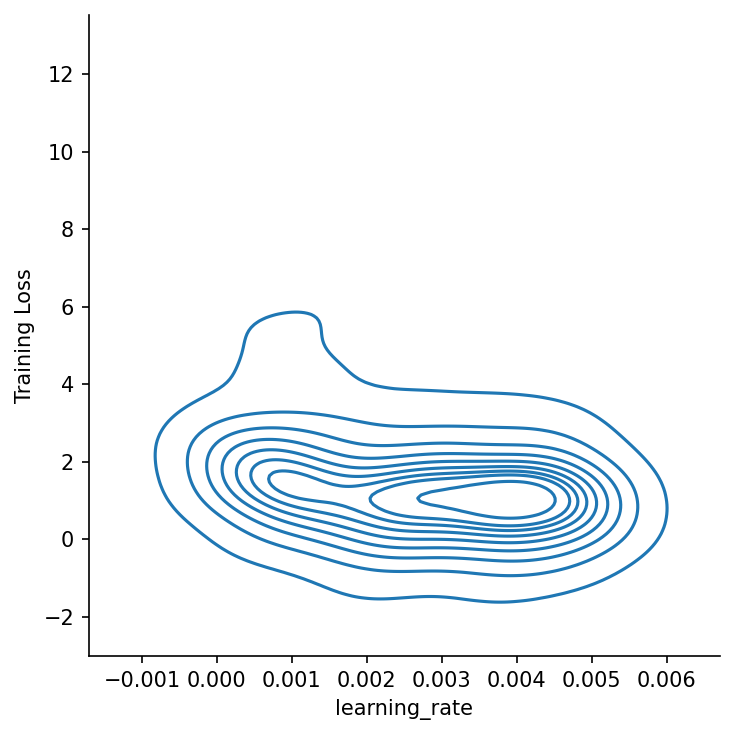

In [18]:
sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .1e-5), cbar=False)

In [19]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

62    q2_tune_hopper_dagger_Hopper-v4_15-09-2022_23-...
Name: id, dtype: object

In [20]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

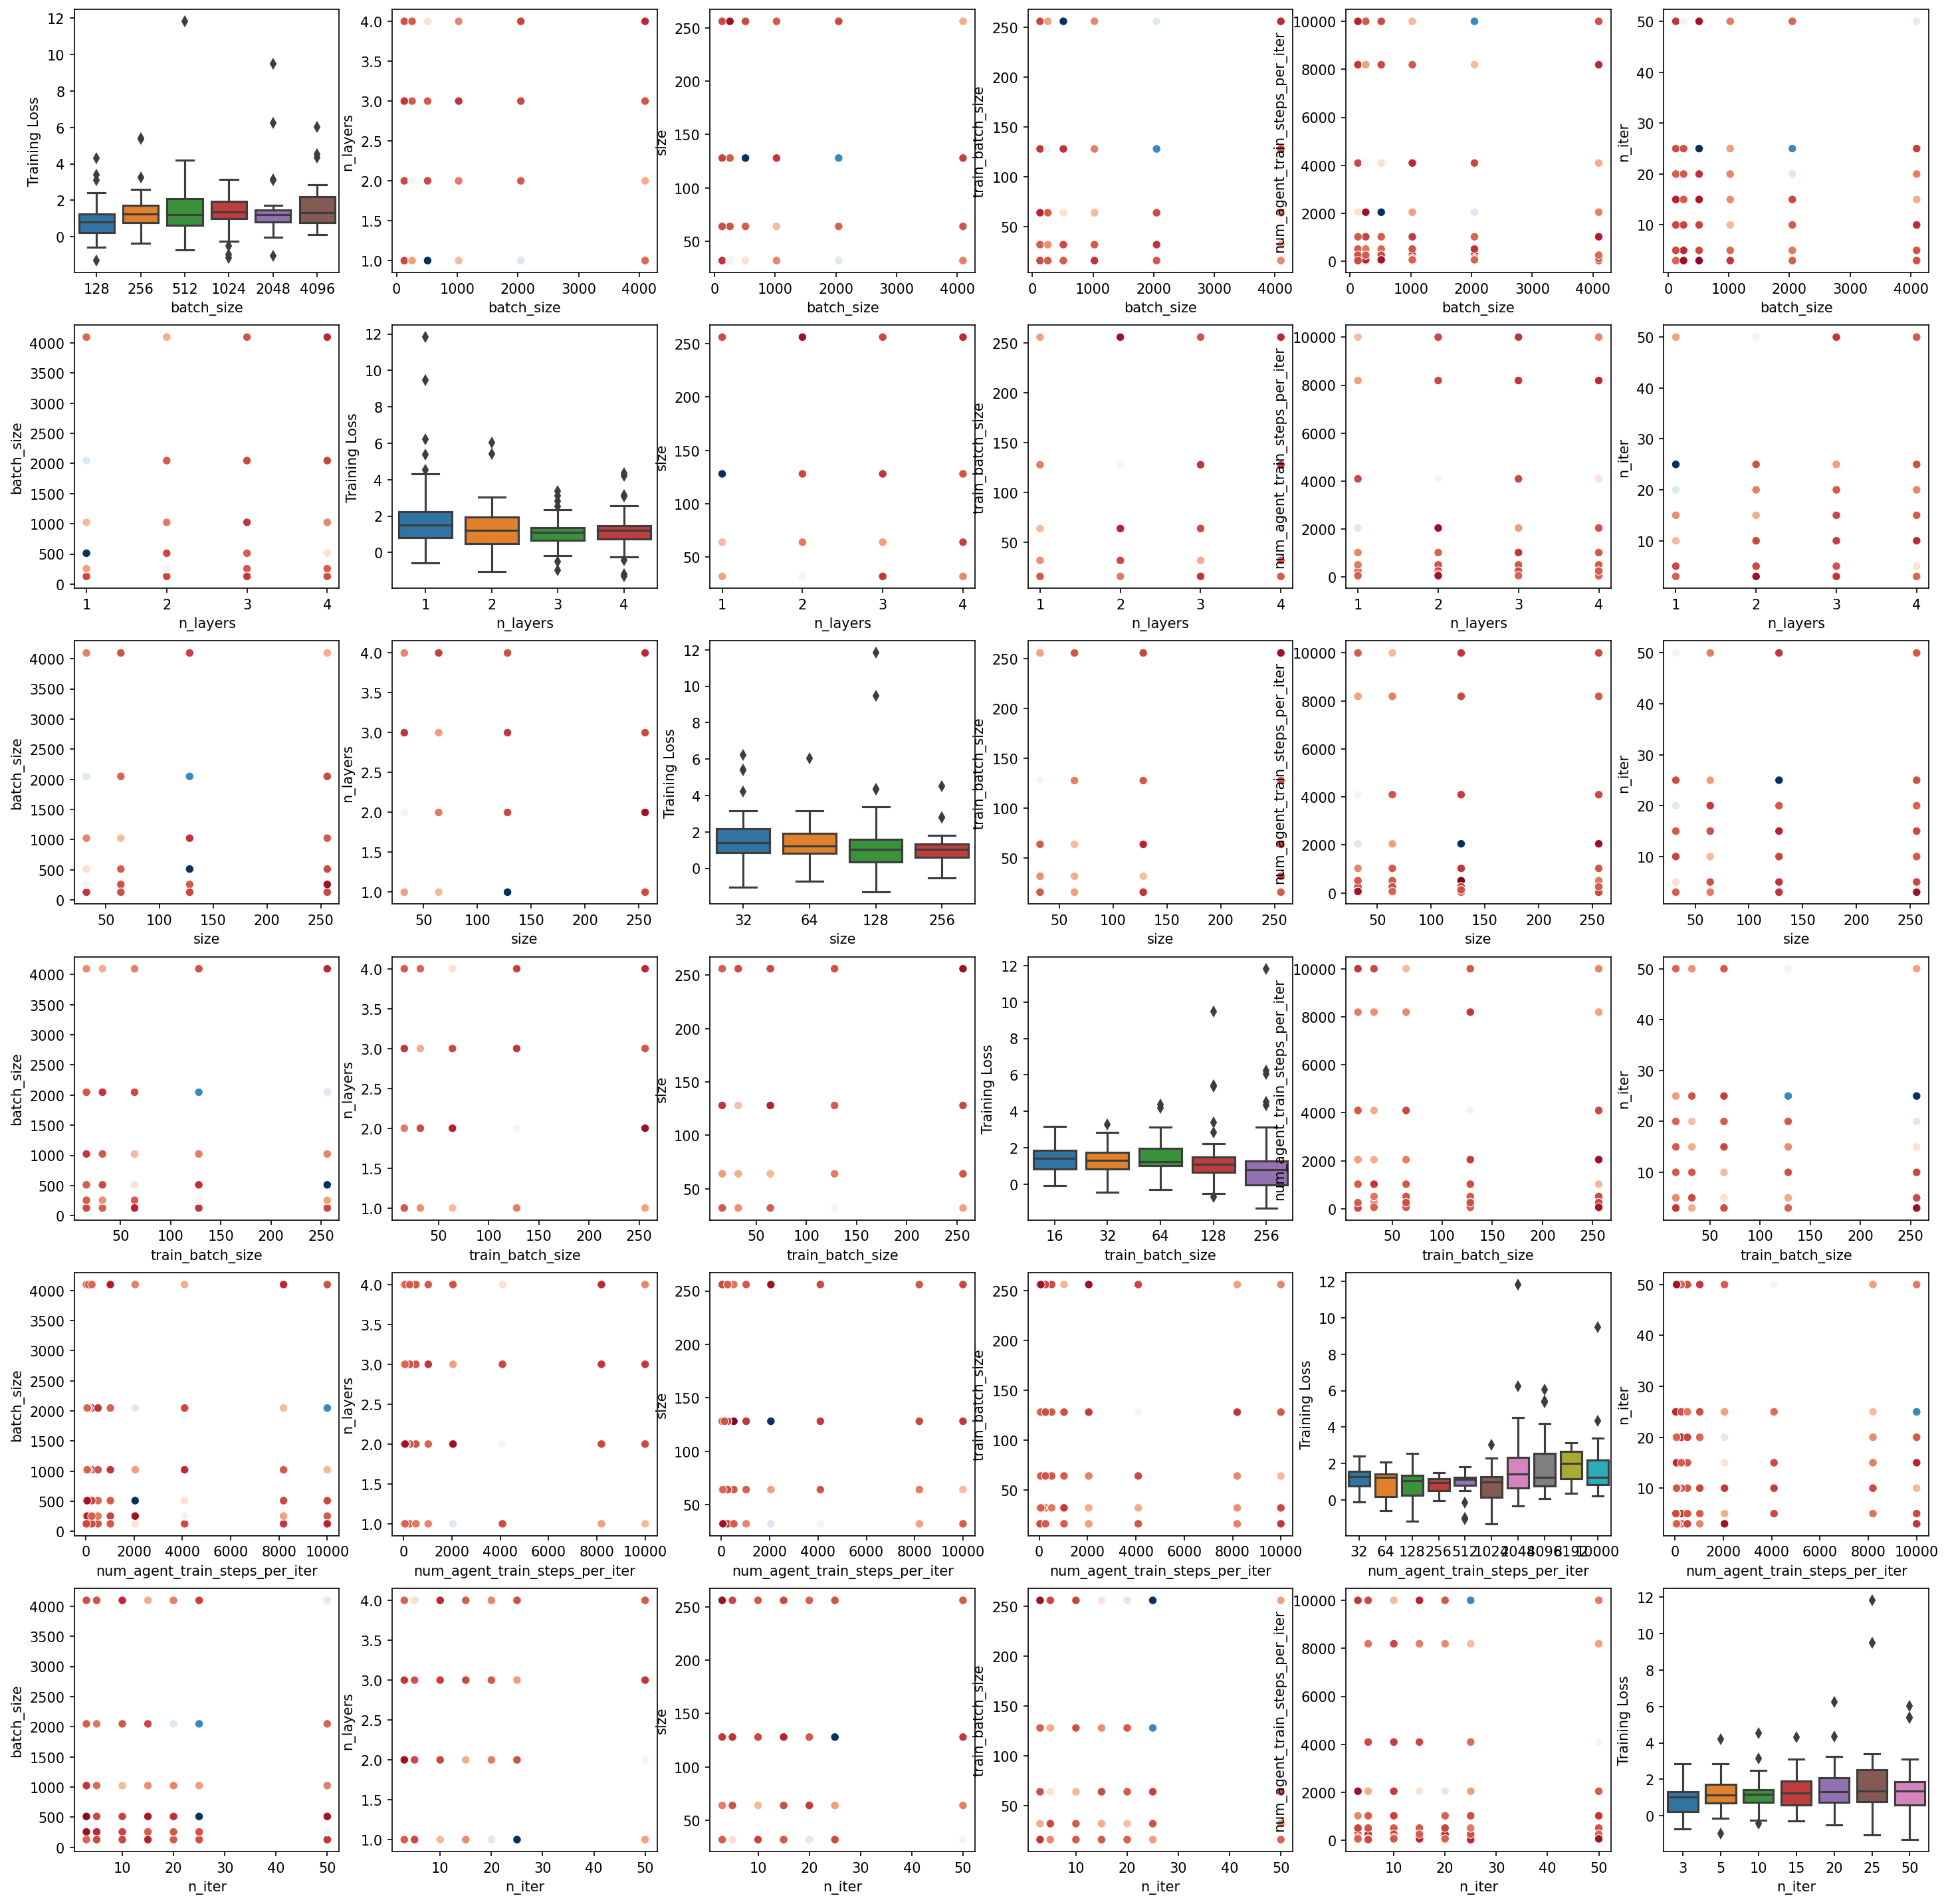

In [21]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


In [22]:
df['Training Loss'].min()

-1.3125122

## Evaluating the best model's performance

### Best config extraction

In [23]:
df[df['Training Loss'] == df['Training Loss'].min()].to_dict(orient='records')

[{'Iteration': nan,
  'Eval_AverageReturn': 1267.2158,
  'Eval_StdReturn': 343.31097,
  'Eval_MaxReturn': 2754.2385,
  'Eval_MinReturn': 896.8659,
  'Eval_AverageEpLen': 358.0357142857143,
  'Train_AverageReturn': 1100.8308,
  'Train_StdReturn': 0.0,
  'Train_MaxReturn': 1100.8308,
  'Train_MinReturn': 1100.8308,
  'Train_AverageEpLen': 315.0,
  'Train_EnvstepsSoFar': 17362,
  'TimeSinceStart': 1163.4677140712738,
  'Training Loss': -1.3125122,
  'Initial_DataCollection_AverageReturn': 3772.6704,
  'Expert_AverageReturn': nan,
  'Expert_StdReturn': nan,
  'Expert_MaxReturn': nan,
  'Expert_MinReturn': nan,
  'Expert_AverageEpLen': nan,
  'Agent_Accuracy': nan,
  'id': 'q2_tune_hopper_dagger_Hopper-v4_15-09-2022_23-37-35',
  'expert_policy_file': 'cs285/policies/experts/Hopper.pkl',
  'expert_data': 'cs285/expert_data/expert_data_Hopper-v4.pkl',
  'env_name': 'Hopper-v4',
  'exp_name': 'tune_hopper_dagger',
  'do_dagger': True,
  'ep_len': 1024,
  'num_agent_train_steps_per_iter': 1024,

In [24]:
!pwd

/home/mohsen/projects/cs285/hw1


In [26]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/Hopper.pkl --env_name Hopper-v4 --exp_name dagger_hopper_best --n_iter 50 --expert_data cs285/expert_data/expert_data_Hopper-v4.pkl --video_log_freq 10 --size 128 --n_layers 4 --train_batch_size 256 --ep_len 1024 --batch_size 128 --eval_batch_size 10000 --learning_rate 0.0019139479730050913 --num_agent_train_steps_per_iter 1024 --seed 557 --save_params --do_dagger

########################
logging outputs to  /home/mohsen/projects/cs285/hw1/cs285/scripts/../../data/q2_dagger_hopper_best_Hopper-v4_16-09-2022_18-43-08
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Hopper.pkl
obs (1, 11) (1, 11)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Iteration : 0
Eval_AverageReturn : 1082.1416015625
Eval_StdReturn : 216.24058532714844
Eval_MaxReturn : 1619.152587890625
Eval_MinReturn : 691.1321411132812
Eval_AverageEpLen : 315.1875
Train_AverageReturn : 3772.67041015625
Train_StdReturn : 1.9483642578125
Train_MaxReturn : 3774.61865234375
Train_MinReturn : 3770.721923828125
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 23.620564937591553
Training Loss : -0.8857824802398682
Initial_DataCollection_AverageReturn : 3772.67041015625
Expert_AverageReturn : 3716.697265625
Expert_StdRetu

In [27]:
df = pd.read_csv('data/q2_dagger_hopper_best_Hopper-v4_16-09-2022_18-43-08/progress.csv')
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,Train_EnvstepsSoFar,TimeSinceStart,Training Loss,Initial_DataCollection_AverageReturn,Expert_AverageReturn,Expert_StdReturn,Expert_MaxReturn,Expert_MinReturn,Expert_AverageEpLen,Agent_Accuracy
0,0,1082.1416,216.24059,1619.1526,691.13214,315.187500,3772.6704,1.948364,3774.6187,3770.7220,...,0,23.620565,-0.885783,3772.6704,3716.6973,3.113793,3722.7480,3712.5684,315.187500,0.291157
1,1,1455.9180,261.67096,1923.1556,803.20215,419.250000,1171.7256,0.000000,1171.7256,1171.7256,...,332,64.648745,-1.691436,3772.6704,3716.7515,3.642602,3722.7944,3710.3652,419.250000,0.391718
2,2,1557.4028,435.12796,2496.4988,1189.07350,487.095238,1291.5450,0.000000,1291.5450,1291.5450,...,689,104.260837,-1.791330,3772.6704,3716.9272,2.757928,3720.9902,3711.3398,487.095238,0.419003
3,3,2822.9844,730.11053,3724.4766,1368.00590,765.428571,1216.0627,0.000000,1216.0627,1216.0627,...,1088,144.414109,-1.799164,3772.6704,3717.6836,3.304279,3721.7330,3711.0386,765.428571,0.759079
4,4,2069.2344,689.96010,3419.6987,1096.97920,562.055556,3587.1177,0.000000,3587.1177,3587.1177,...,2088,184.395842,-1.750193,3772.6704,3718.2026,2.500098,3722.1494,3713.3160,562.055556,0.556515


/tmp/ipykernel_3609280/281154726.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='value', hue='kind',


<AxesSubplot:xlabel='Iteration', ylabel='Return'>

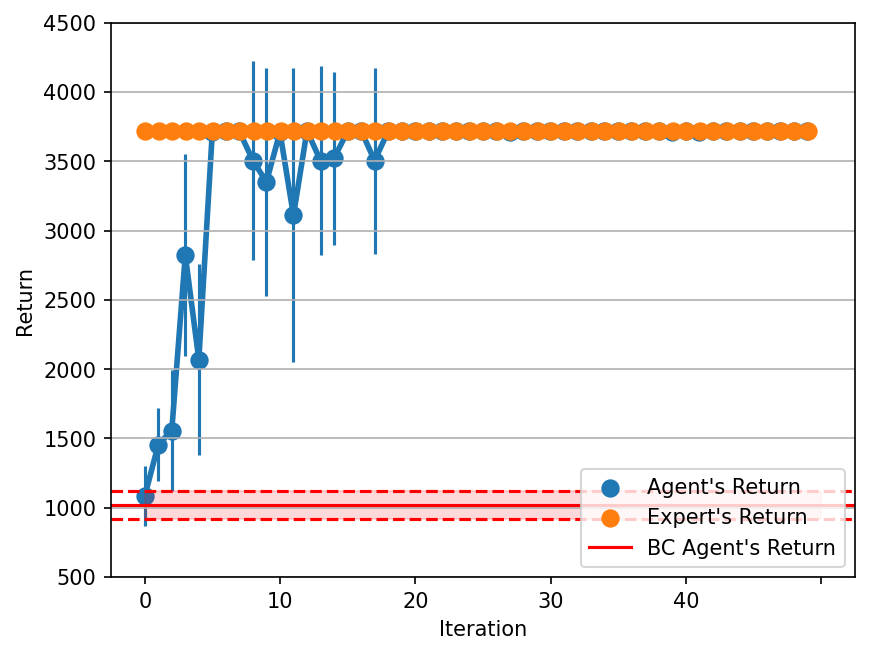

In [37]:
melted_df = pd.melt(df, id_vars=['Iteration'], var_name='kind')

melted_df = melted_df[melted_df['kind'].isin(['Eval_AverageReturn', 'Expert_AverageReturn'])]

melted_df['kind'] = melted_df['kind'].str.replace('Eval_AverageReturn', 'Agent\'s Return')
melted_df['kind'] = melted_df['kind'].str.replace('Expert_AverageReturn', 'Expert\'s Return')

ax = sns.pointplot(x='Iteration', y='value', hue='kind',
    data=melted_df, dodge=True, join=True, ci=None)
# plt.legend()
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)


# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
errors = df['Eval_StdReturn'].values
ax.errorbar(x_coords[:len(x_coords) // 2], y_coords[:len(x_coords) // 2], yerr=errors, fmt=' ', zorder=-1)

errors = df['Expert_StdReturn'].values
ax.errorbar(x_coords[len(x_coords) // 2:], y_coords[len(x_coords) // 2:], yerr=errors, fmt=' ', zorder=-1)
plt.grid(axis='y')
plt.ylabel('Return')
mean = 1021.7330932617188
std = 100.39884948730469
plt.axhline(y=mean + std, color='r', linestyle='--')
plt.axhline(y=mean - std, color='r', linestyle='--')
plt.axhline(y=mean, color='r', linestyle='-', label='BC Agent\'s Return')
ax.fill_between(x=np.arange(0, len(df) + 1), y1=mean - std, y2=mean + std, alpha=0.15, color='r')
plt.legend(loc='lower right')
plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.yticks(np.arange(500, 4501, 500))
ax

/tmp/ipykernel_3609280/3747901890.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Agent_Accuracy',


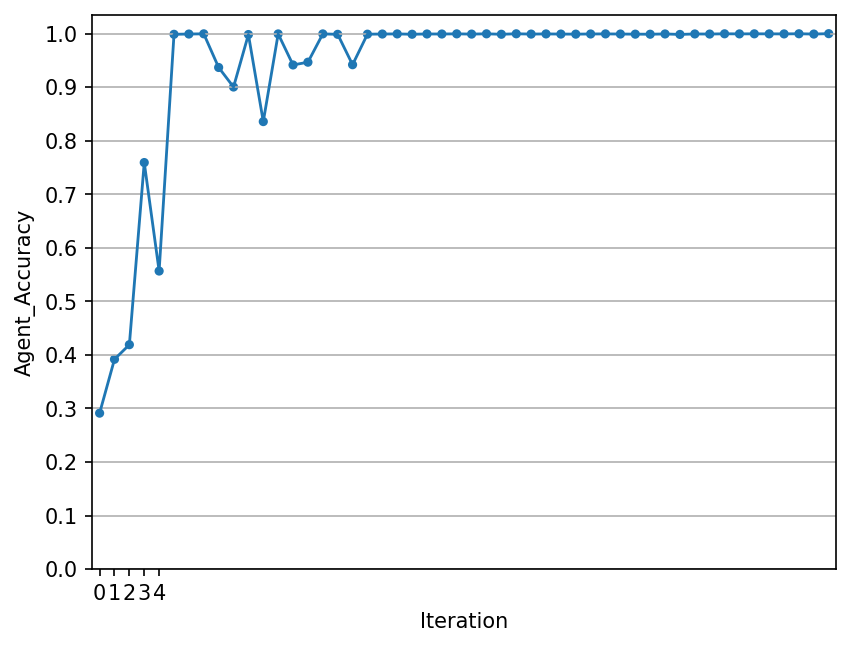

In [39]:
ax = sns.pointplot(x='Iteration', y='Agent_Accuracy', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid(axis='y')
# plt.show()

/tmp/ipykernel_3609280/623469160.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Training Loss',


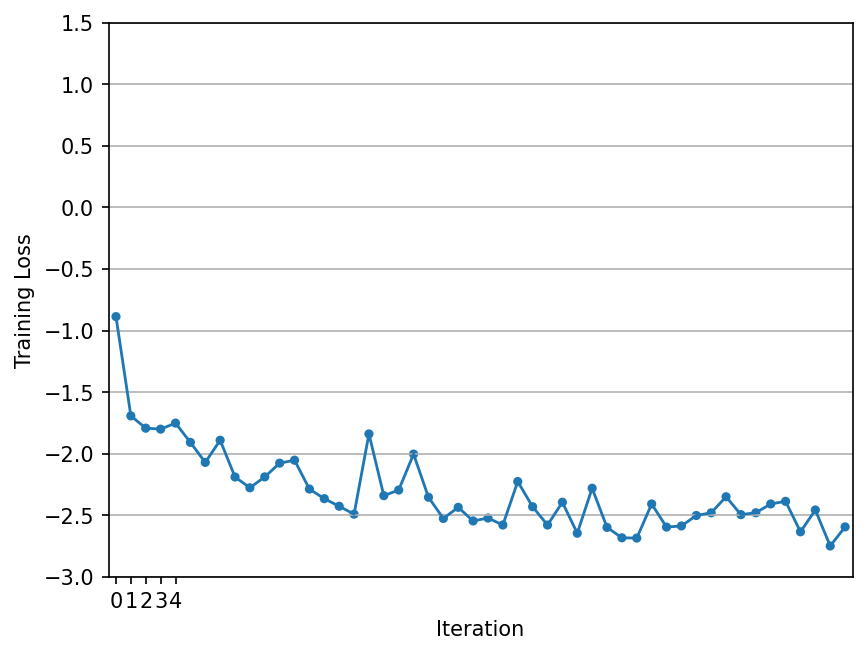

In [42]:
ax = sns.pointplot(x='Iteration', y='Training Loss', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(1.5, -3.5, -0.5))
plt.grid(axis='y')
plt.show()